[132.0, 13.25, 0, 6.87, 0]
[528.0, 13.25, 0, 6.87, 0]


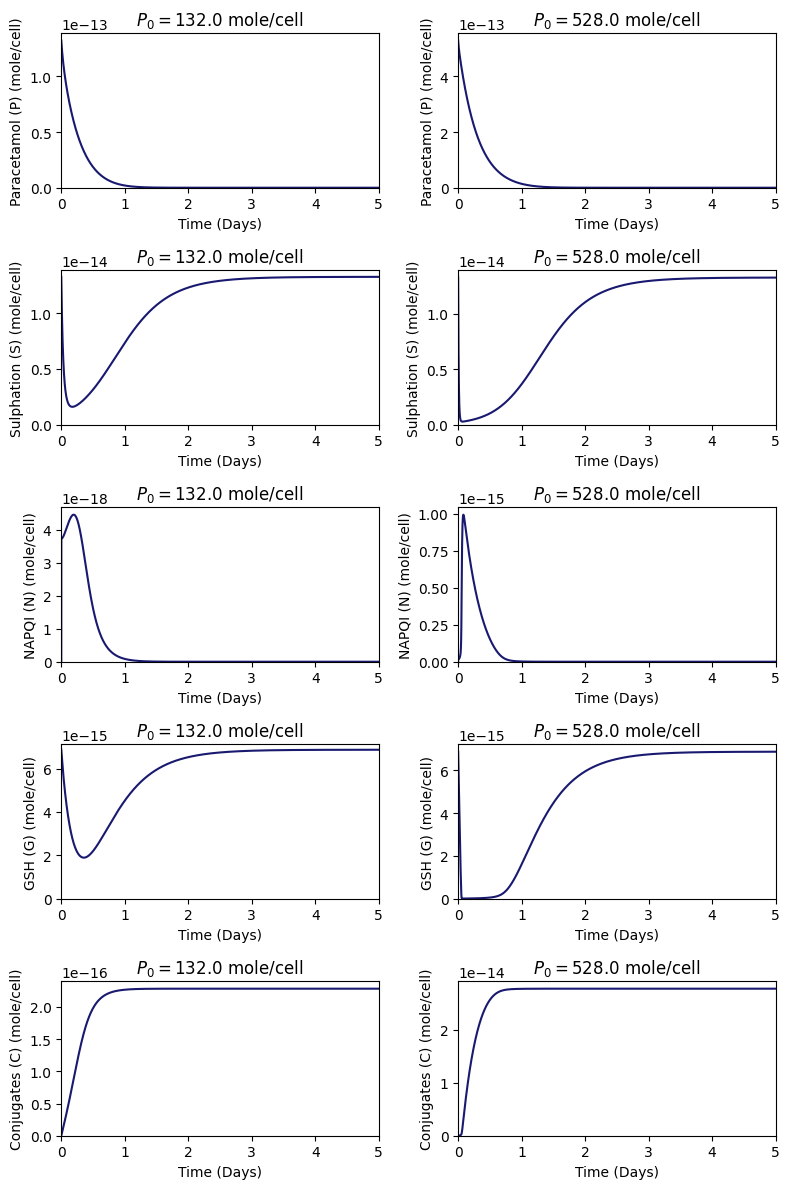

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, ode
 
"""
Reddyhoff et al. (2015)
https://www.sciencedirect.com/science/article/pii/S0022519315004142
"""
 
def dFdt_original(F,t):
    """
    System of differential equations.
    Equations 1-5 in Reddyhoff et al. (2015)

    Notation
    --------
    P: Paracetamol (APAP)
    S: Sulphate (PAPS)
    N: NAPQI
    G: GSH
    C: Protein adducts

    """
    dF = [0,0,0,0,0] # P, S, N, G, C
    P = F[0]
    S = F[1]
    N = F[2]
    G = F[3]
    C = F[4]
 
    dF[0] = -k_s*S*P - k_G*P - k_450*P + k_N*N
    dF[1] = -k_s*S*P + b_s - d_s*S
    dF[2] = k_450*P - k_N*N - k_GSH*N*G - k_PSH*N
    dF[3] = -k_GSH*N*G + b_G - d_G*G
    dF[4] = k_PSH*N
   
    return dF

### Model parameters ###

# Note: 1 femtomole (fmole) = 10^-15 mol
d_G = 2 # 1/day
b_G = (1.374e-14) * 10**15 # femtomoles/cell/day
k_GSH = (1.6e18) * 10**-15 # cell/femtomoles/day
k_G = 2.99 # 1/day
k_s = (2.26e14) * 10**-15 # cell/femtomoles/day
b_s = (2.65e-14) * 10**15 # femtomoles/cell/day
d_s = 2 # 1/day
k_450 = 0.315 # 1/day
k_N = 0.0315 # 1/day
k_PSH = 110 # 1/day

### Setup for the simulation ###

# titles for plots:
variables = ["Paracetamol (P)", "Sulphation (S)", "NAPQI (N)", "GSH (G)", "Conjugates (C)"]
# the 2 initial conditions for P0 that the paper used:
P0 = [(1.32e-13) * 10**15, (5.28e-13) * 10**15] # femtomoles/cell

# times
t_min = 0
t_max = 5
dt = 0.001
times = np.arange(t_min, t_max+dt, dt) #generate time-grid list

### Running the simulation and plotting ###

fig, axes = plt.subplots(5, 2, figsize=(8, 12))

for i, initial_P0 in enumerate(P0):
    # Running a simulation for each case of P0:
    F0 = [initial_P0, b_s/d_s, 0, b_G/d_G, 0]
    
    print(F0)
    F = odeint(dFdt_original, F0, times)  # Run simulation
    for j, variable in enumerate(variables):
        # Plotting each subplot:
        axes[j, i].plot(times, F[:,j] * 10**-15, color='midnightblue')
        axes[j, i].set_xlabel("Time (Days)")
        axes[j, i].set_ylabel(f"{variables[j]} (mole/cell)")
        axes[j, i].set_title(f"$P_0 = {initial_P0}$ mole/cell")
        axes[j, i].set_xlim(0, 5)
        axes[j, i].set_ylim(0,)

plt.tight_layout()
plt.show()

[0, 4, 8, 12, 24, 28, 32, 36, 48, 52, 56, 60, 72, 76, 80, 84, 96, 100, 104, 108, 120]
[33.0, 13.25, 0, 6.87, 0]
[132.0, 13.25, 0, 6.87, 0]


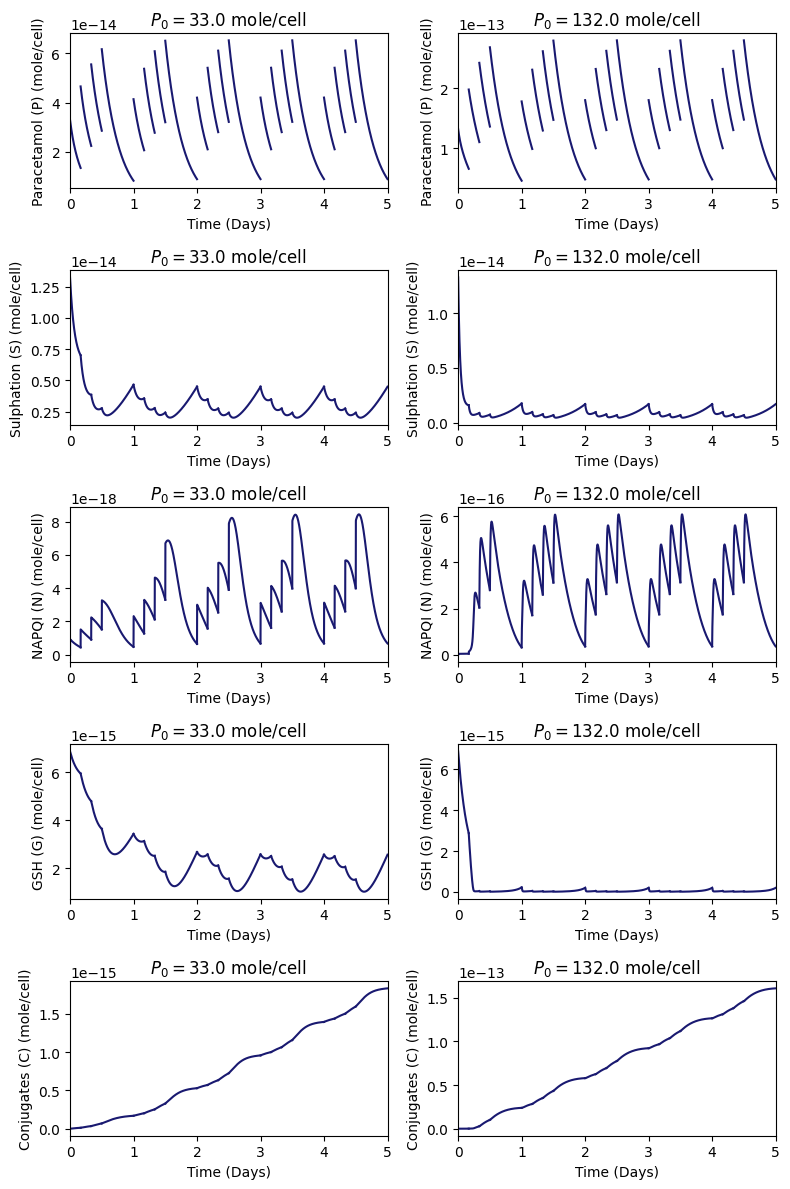

In [2]:
### Setting up times (in hours) to take acetaminophen ###

P0 = [((1.32e-13) * 10**15)/4, ((5.28e-13) * 10**15)/4] # femtomoles/cell

# making list like dose_times = [0, 4, 8, 12, 24, 28, 32, 36, 48 ...]
dose_times = []
for day in range(5):
    dose_times.append(24*day)
    for n in range(3):
        dose_times.append(24*day + 4*(n+1))
dose_times.append(24*5)
print(dose_times)

fig, axes = plt.subplots(5, 2, figsize=(8, 12))

for i, initial_P0 in enumerate(P0):
    # Running a simulation for each case of P0:
    F0 = [initial_P0, b_s/d_s, 0, b_G/d_G, 0]
    print(F0)
    for t in range(len(dose_times)-1):
        # setting up a 4 or 12 hour time period, depending on the time of day
        t_min = 0
        t_max = (dose_times[t+1] - dose_times[t])/24
        times = np.arange(t_min, t_max+dt, dt)
        F = odeint(dFdt_original, F0, times)  # Run simulation
        #print(F.shape)
        for j, variable in enumerate(variables):
            # Plotting each subplot:
            # the times are offset by the dose time
            axes[j, i].plot(times + dose_times[t]/24, F[:,j] * 10**-15, color='midnightblue')
            axes[j, i].set_xlabel("Time (Days)")
            axes[j, i].set_ylabel(f"{variables[j]} (mole/cell)")
            axes[j, i].set_title(f"$P_0 = {initial_P0}$ mole/cell")
            axes[j, i].set_xlim(0, 5)
            #axes[j, i].set_ylim(0,)
        # the final values become the initial conditions for the next dose:
        F0 = [F[-1,0]+P0[i], F[-1,1], F[-1,2], F[-1,3], F[-1,4]]
        #print([F[-1,0]+P0[i], F[-1,1], F[-1,2], F[-1,3], F[-1,4]])

plt.tight_layout()
plt.show()

Note:

- I added 132 fmoles/cell or 528 fmoles/cell at each iteration in the plots above -- this parameter might be wrong. It's in the line: 

`F0 = [F[-1,0]+P0[i], F[-1,1], F[-1,2], F[-1,3], F[-1,4]]`

- Also, NAPQI looks off.

# The code is very messy right now, I will clean it up later

C:\Users\karol\AppData\Local\Temp\ipykernel_28412\699706500.py:44: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 10e-13)


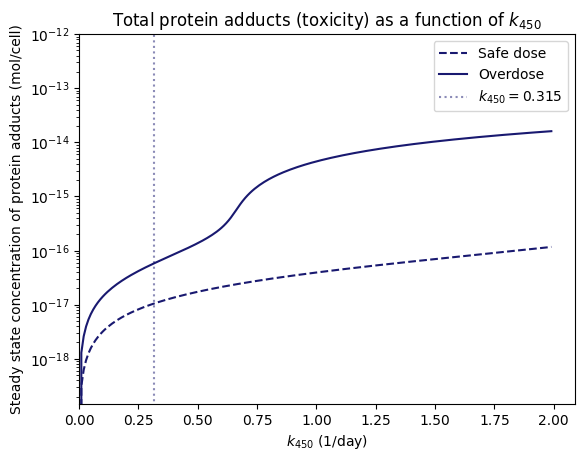

In [11]:
def k_450_simulation(variable=4, name='protein adducts'):

    """
    Steady state of a model variable as a function of k_450.
    Like Figures 9 and 10 in the paper (I think).

    Parameters
    ----------
    variable: Each number corresponds with a variable to plot:
        0: Paracetamol (APAP)
        1: Sulphate (PAPS)
        2: NAPQI
        3: GSH
        4: Protein adducts
    name: A string for the plot titles
    """
    global k_450

    P0 = [(1.32e-13) * 10**15, (5.28e-13) * 10**15] # femtomoles/cell

    # times
    t_min = 0
    t_max = 5
    dt = 0.001
    times = np.arange(t_min, t_max+dt, dt) #generate time-grid list

    safe_dose = []
    overdose = []

    for k in np.arange(0, 2, 0.01):
        k_450 = k
        F0 = [P0[0], b_s/d_s, 0, b_G/d_G, 0]
        F = odeint(dFdt_original, F0, times)
        safe_dose.append(F[-1,variable])
        F0 = [P0[1], b_s/d_s, 0, b_G/d_G, 0]
        F = odeint(dFdt_original, F0, times)
        overdose.append(F[-1,variable])

    plt.plot(np.arange(0, 2, 0.01), np.array(safe_dose) * 10**-15, '--', color='midnightblue', label='Safe dose')
    plt.plot(np.arange(0, 2, 0.01), np.array(overdose) * 10**-15, color='midnightblue', label='Overdose')
    plt.plot([0.315, 0.315], [0, 10e-13], ":", color='midnightblue', alpha=0.5, label='$k_{{450}}=0.315$')
    plt.yscale('log')
    plt.xlim(0,)
    plt.ylim(0, 10e-13)
    plt.title("Total protein adducts (toxicity) as a function of $k_{{450}}$")
    plt.ylabel(f"Steady state concentration of {name} (mol/cell)")
    plt.xlabel("$k_{{450}}$ (1/day)")
    plt.legend()
    plt.show()

k_450_simulation()

C:\Users\karol\AppData\Local\Temp\ipykernel_28412\1250962393.py:28: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 10e-13)


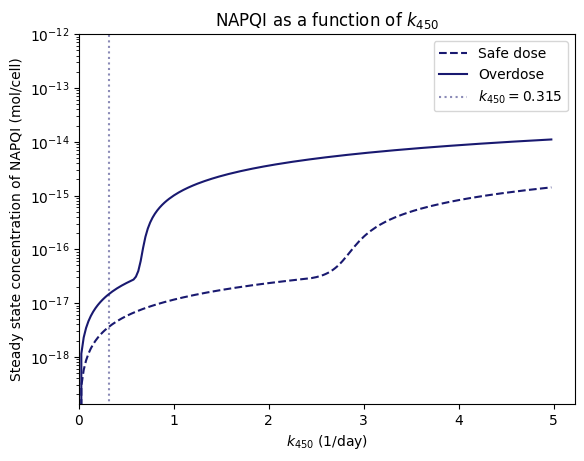

In [18]:
P0 = [(1.32e-13) * 10**15, (5.28e-13) * 10**15] # femtomoles/cell

# times
t_min = 0
t_max = 5
dt = 0.001
times = np.arange(t_min, t_max+dt, dt) #generate time-grid list

safe_dose = []
overdose = []

k_450_max = 5

for k in np.arange(0, k_450_max, k_450_max/200):
    k_450 = k
    F0 = [P0[0], b_s/d_s, 0, b_G/d_G, 0]
    F = odeint(dFdt_original, F0, times)
    safe_dose.append(np.max(F[:, 2]))
    F0 = [P0[1], b_s/d_s, 0, b_G/d_G, 0]
    F = odeint(dFdt_original, F0, times)
    overdose.append(np.max(F[:, 2]))

plt.plot(np.arange(0, k_450_max, k_450_max/200), np.array(safe_dose) * 10**-15, '--', color='midnightblue', label='Safe dose')
plt.plot(np.arange(0, k_450_max, k_450_max/200), np.array(overdose) * 10**-15, color='midnightblue', label='Overdose')
plt.plot([0.315, 0.315], [0, 10e-13], ":", color='midnightblue', alpha=0.5, label='$k_{{450}}=0.315$')
plt.yscale('log')
plt.xlim(0,)
plt.ylim(0, 10e-13)
plt.title("NAPQI as a function of $k_{{450}}$")
plt.ylabel(f"Steady state concentration of NAPQI (mol/cell)")
plt.xlabel("$k_{{450}}$ (1/day)")
plt.legend()
plt.show()

C:\Users\karol\AppData\Local\Temp\ipykernel_28412\530162256.py:27: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 10e-13)


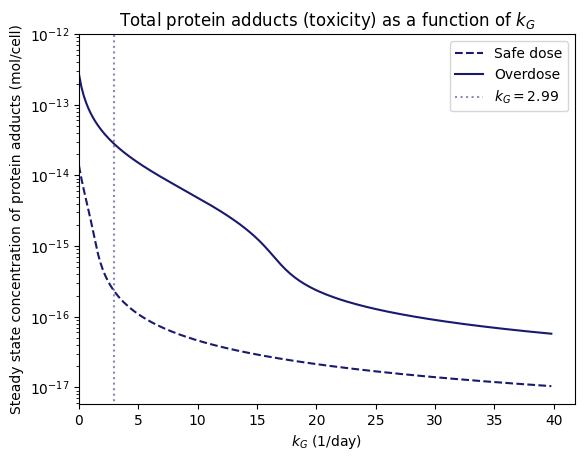

In [7]:
k_450 = 0.315 # 1/day
P0 = [(1.32e-13) * 10**15, (5.28e-13) * 10**15] # femtomoles/cell

# times
t_min = 0
t_max = 5
dt = 0.001
times = np.arange(t_min, t_max+dt, dt) #generate time-grid list

safe_dose = []
overdose = []

for k in np.arange(0, 40, 0.2):
    k_G = k
    F0 = [P0[0], b_s/d_s, 0, b_G/d_G, 0]
    F = odeint(dFdt_original, F0, times)
    safe_dose.append(F[-1,4])
    F0 = [P0[1], b_s/d_s, 0, b_G/d_G, 0]
    F = odeint(dFdt_original, F0, times)
    overdose.append(F[-1,4])

plt.plot(np.arange(0, 40, 0.2), np.array(safe_dose) * 10**-15, '--', color='midnightblue', label='Safe dose')
plt.plot(np.arange(0, 40, 0.2), np.array(overdose) * 10**-15, color='midnightblue', label='Overdose')
plt.plot([2.99, 2.99], [0, 10e-13], ":", color='midnightblue', alpha=0.5, label='$k_{{G}}=2.99$')
plt.yscale('log')
plt.xlim(0,)
plt.ylim(0, 10e-13)
plt.title("Total protein adducts (toxicity) as a function of $k_{{G}}$")
plt.ylabel("Steady state concentration of protein adducts (mol/cell)")
plt.xlabel("$k_{{G}}$ (1/day)")
plt.legend()
plt.show()

# Alcohol extension 

[132.0, 13.25, 0, 6.87, 0, 0]
[528.0, 13.25, 0, 6.87, 0, 0]


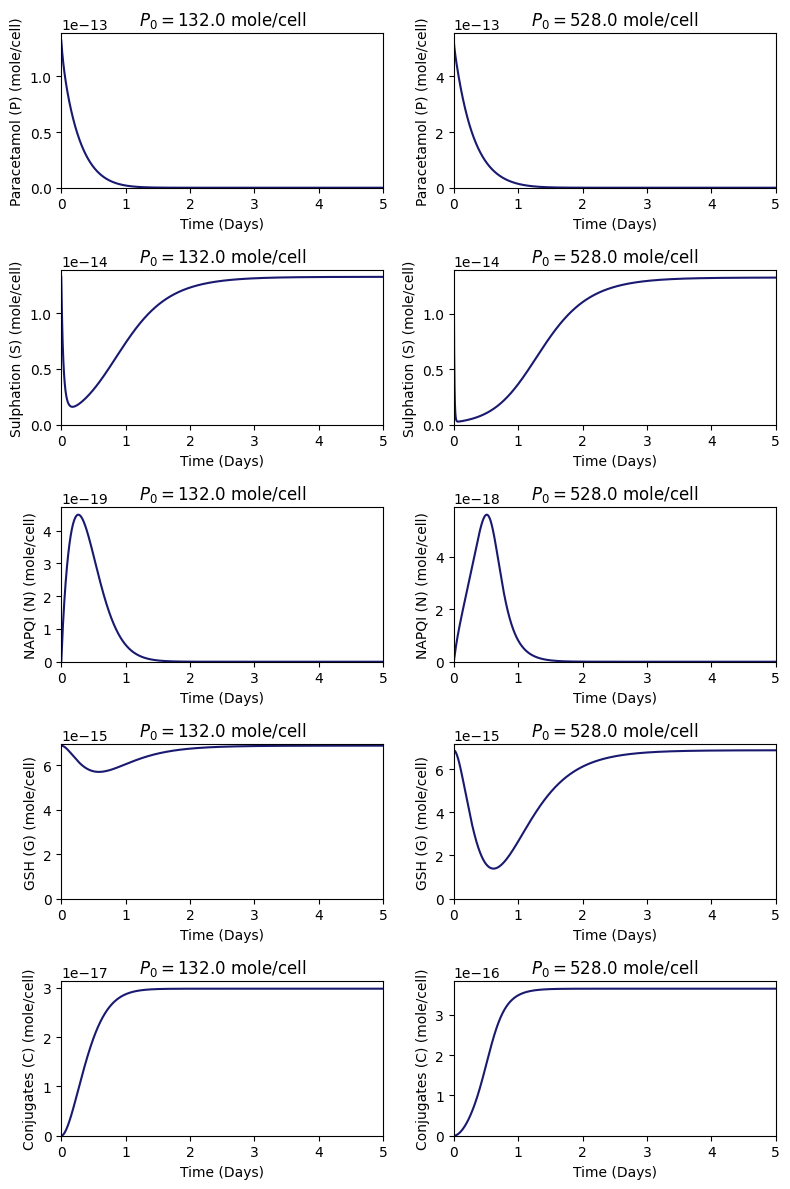

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, ode
 
"""
Ghosh et al. (2021)
https://www.sciencedirect.com/science/article/pii/S0022519320304148#f0005
"""
 
def dFdt_alcohol(F,t):
    """
    System of differential equations.
    Ghosh et al. (2021)

    Notation
    --------
    P: Paracetamol (APAP)
    S: Sulphate (PAPS)
    N: NAPQI
    G: GSH
    C: Protein adducts
    CYP: CYP2E1

    """
    dF = [0,0,0,0,0,0] # P, S, N, G, C, CYP
    P = F[0]
    S = F[1]
    N = F[2]
    G = F[3]
    C = F[4]
    CYP = F[5]
 
    # I commented out the backwards reaction I removed
    # q*k_cyp*P*CYP/(1+E/k_i) is the new term
    dF[0] = -k_s*S*P - k_G*P - k_450*P # + k_N*N
    dF[1] = -k_s*S*P + b_s - d_s*S
    dF[2] = (q*k_cyp*P*CYP/(1+E/k_i)) - k_GSH*N*G - k_PSH*N # - k_N*N
    dF[3] = -k_GSH*N*G + b_G - d_G*G
    dF[4] = k_PSH*N

    # the new DE:
    dF[5] = k_deg*C_01 - CYP*k_deg/(1 + E/k_i)
   
    return dF

### Model parameters ###

# Note: 1 femtomole (fmole) = 10^-15 mol
d_G = 2 # 1/day
b_G = (1.374e-14) * 10**15 # femtomoles/cell/day
k_GSH = (1.6e18) * 10**-15 # cell/femtomoles/day
k_G = 2.99 # 1/day
k_s = (2.26e14) * 10**-15 # cell/femtomoles/day
b_s = (2.65e-14) * 10**15 # femtomoles/cell/day
d_s = 2 # 1/day
k_450 = 0.315 # 1/day
k_N = 0.0315 # 1/day
k_PSH = 110 # 1/day

### New parameters ###

E = 1 # The constant alcohol concentration that we need to choose
k_deg = 2.273792 # 1/day -- this parameter is fine, I think
C_01 = 1 # the paper says 1 mol/cell
k_i = 1 # the paper says 200 g???
q = 1 # Conversion factor from grams of APAP to moles of NAPQI ???
k_cyp = (0.373) # The paper has it in moles, but we might want femtomoles
# changing k_cyp to femtomoles makes it weird

### Setup for the simulation ###

# titles for plots:
variables = ["Paracetamol (P)", "Sulphation (S)", "NAPQI (N)", "GSH (G)", "Conjugates (C)"]
# the 2 initial conditions for P0 that the paper used:
P0 = [(1.32e-13) * 10**15, (5.28e-13) * 10**15] # femtomoles/cell

# times
t_min = 0
t_max = 5
dt = 0.001
times = np.arange(t_min, t_max+dt, dt) #generate time-grid list

### Running the simulation and plotting ###

fig, axes = plt.subplots(5, 2, figsize=(8, 12))

for i, initial_P0 in enumerate(P0):
    # Running a simulation for each case of P0:
    F0 = [initial_P0, b_s/d_s, 0, b_G/d_G, 0, 0]
    
    print(F0)
    F = odeint(dFdt_alcohol, F0, times)  # Run simulation
    for j, variable in enumerate(variables):
        # Plotting each subplot:
        axes[j, i].plot(times, F[:,j] * 10**-15, color='midnightblue')
        axes[j, i].set_xlabel("Time (Days)")
        axes[j, i].set_ylabel(f"{variables[j]} (mole/cell)")
        axes[j, i].set_title(f"$P_0 = {initial_P0}$ mole/cell")
        axes[j, i].set_xlim(0, 5)
        axes[j, i].set_ylim(0,)

plt.tight_layout()
plt.show()